First trying to reproduce an example to get a general idea of the KNN model

In [12]:
from sklearn import datasets 
import pandas as pd
import matplotlib.pyplot as plt

iris = datasets.load_iris()

print(type(iris))
print(iris.keys())
print(type(iris.data), type(iris.target))
print(iris.data.shape)
print(iris.target_names)

X = iris.data 
Y = iris.target

df = pd.DataFrame(X, columns=iris.feature_names)
print(df.head())

<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(150, 4)
['setosa' 'versicolor' 'virginica']
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [13]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier

iris = datasets.load_iris()

knn = KNeighborsClassifier(n_neighbors=6)

knn.fit(iris['data'], iris['target'])

X = [
    [5.9, 1.0, 5.1, 1.8], 
    [3.4, 2.0, 1.1, 4.8]
]

print(X)

prediction = knn.predict(X)

print(prediction)

[[5.9, 1.0, 5.1, 1.8], [3.4, 2.0, 1.1, 4.8]]
[1 1]


Applying the KNN model on the project Motoric

In [ ]:
# Without validation set

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd 

# Import dataset:
url = "../Data for model.csv"

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', 200)

# Convert dataset to a pandas dataframe:
dataset = pd.read_csv(url, sep=';')

dataset.dropna(subset = ["Gender"], inplace=True)
dataset.dropna(subset = ["Leeftijd (op testdag)"], inplace=True)
# dataset.dropna(subset = ["AST (tijd afgerond op 0,1s)"], inplace=True)
dataset.dropna(subset = ["BMI"], inplace=True)
dataset.dropna(subset = ["Gymles"], inplace=True)
# dataset.dropna(subset = ["Categorie"], inplace=True)

# Use head() function to return the first 5 rows: 
dataset.head() 
# Assign values to the X and y variables:
X = dataset.iloc[:, :-1].values #data
y = dataset.iloc[:, 5].values #target
print(y)

# Split dataset into random train and test subsets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) 

# Use the KNN classifier to fit data:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train) 

# Predict y data with classifier: 
y_predict = classifier.predict(X_test)
print(y_predict)

# Print results: 
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict)) 
print(classifier.score(X_test, y_test))

KNN with pipeline nd model validation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd 

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV

# Import dataset:
url = "../Data for model.csv"

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', 200)

# Convert dataset to a pandas dataframe:
dataset = pd.read_csv(url, sep=';')

dataset.dropna(subset = ["Gender"], inplace=True)
dataset.dropna(subset = ["Leeftijd (op testdag)"], inplace=True)
dataset.dropna(subset = ["AST (tijd afgerond op 0,1s)"], inplace=True)
dataset.dropna(subset = ["BMI"], inplace=True)
dataset.dropna(subset = ["Gymles"], inplace=True)
dataset.dropna(subset = ["Categorie"], inplace=True)

# Use head() function to return the first 5 rows: 
dataset.head() 
# Assign values to the X and y variables:
X = dataset.iloc[:, :-1].values #data
y = dataset.iloc[:, 5].values #target
print(y)

# Split dataset into random train and test subsets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) 

# Use the KNN classifier to fit data:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train) 

# Predict y data with classifier: 
y_predict = knn_classifier.predict(X_test)
print(y_predict)

# Print results: 
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict)) 
print(knn_classifier.score(X_test, y_test))

# creating pipeline 
pipeline = make_pipeline(RobustScaler(), SelectKBest(f_classif), LogisticRegression(solver='lbfgs'))

# model validation
param_grid = {
    'selectkbest__k': [1, 2, 3, 4], 
    'logisticregression__class_weight': [None, 'balanced'],
    'logisticregression__C': [.0001, .001, .01, .1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
}

gridsearch = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
print(gridsearch.fit(X_train, y_train))


Example of how to assign several y-values to one x-value and visualize it

/tmp/ipykernel_25068/1115745025.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_xticklabels(['cat1', 'cat2'])


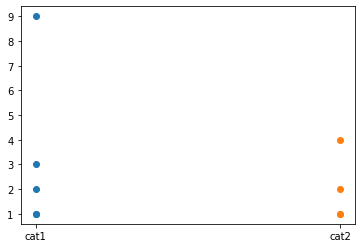

In [19]:
import matplotlib.pyplot as plt
import numpy as np

y = [(1,1,2,3,9), (1,1,2,4)]
x = [1,2]

for xe, ye in zip(x, y): 
    plt.scatter([xe] * len(ye), ye)

plt.xticks([1, 2])
plt.axes().set_xticklabels(['cat1', 'cat2'])

plt.show()

Visualization of a comparison of predicted and original MQ categories of children

In [ ]:
# Visualization of predicted and original MQ categories of children

# Prediction model 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd 


dataset = pd.read_csv('../Data for model.csv', sep=';') 

dataset.dropna(subset = ["Gender"], inplace=True)
dataset.dropna(subset = ["Leeftijd (op testdag)"], inplace=True)
dataset.dropna(subset = ["AST (tijd afgerond op 0,1s)"], inplace=True)
dataset.dropna(subset = ["BMI"], inplace=True)
dataset.dropna(subset = ["Gymles"], inplace=True)
dataset.dropna(subset = ["Categorie"], inplace=True)

dataset.head() 
# print(dataset)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 5].values 

# print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) 

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) 

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train) 
 
y_predict = classifier.predict(X_test)
# print(y_predict)
 
# print(classification_report(y_test, y_predict)) 



# Visualization 

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

t0_data = pd.read_csv("../Pascal/T0_data.csv")

original_MQcategories = t0_data['MQ catogory']
predicted_MQcategories = y_predict

# print(original_MQcategories)
# print(predicted_MQcategories)

x = t0_data['Respondentnummer']
y = [original_MQcategories, predicted_MQcategories]

for xe, ye in zip(x, y): 
    plt.scatter([xe] * len(ye), ye)

plt.show()

In [ ]:
# Improving the visualization 

# Visualization of predicted and original MQ categories of children

# Prediction model 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd 


dataset = pd.read_csv('../Data for model.csv', sep=';') 

dataset.dropna(subset = ["Gender"], inplace=True)
dataset.dropna(subset = ["Leeftijd (op testdag)"], inplace=True)
dataset.dropna(subset = ["AST (tijd afgerond op 0,1s)"], inplace=True)
dataset.dropna(subset = ["BMI"], inplace=True)
dataset.dropna(subset = ["Gymles"], inplace=True)
dataset.dropna(subset = ["Categorie"], inplace=True)

dataset.head() 
# print(dataset)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 5].values 

# print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) 

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) 

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train) 
 
y_predict = classifier.predict(X_test)
# print(y_predict)
 
# print(classification_report(y_test, y_predict)) 



# Visualization 

t0_data = pd.read_csv("../Pascal/T0_data.csv")

original_MQcategories = t0_data['MQ catogory']
predicted_MQcategories = y_predict

# print(original_MQcategories)
# print(predicted_MQcategories)

x = t0_data['Respondentnummer'][:281]
y1 = original_MQcategories[:281]
y2 = predicted_MQcategories

# for xe, ye in zip(x, y): 
#     plt.scatter([xe] * len(ye), ye)

fig, ax = plt.subplots()
ax.plot(x, y1, color="red", marker="o")
ax.set_xlabel("Childrens' IDs")
ax.set_ylabel("MQ categories")
ax.plot(x, y2, color="black", marker="o")

plt.yticks([1, 2, 3, 4, 5])
plt.show()

In [ ]:
# further improving the visualization

# Visualization of predicted and original MQ categories per child

# Prediction model 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd 


dataset = pd.read_csv('../Data for model.csv', sep=';') 

dataset.dropna(subset = ["Gender"], inplace=True)
dataset.dropna(subset = ["Leeftijd (op testdag)"], inplace=True)
dataset.dropna(subset = ["AST (tijd afgerond op 0,1s)"], inplace=True)
dataset.dropna(subset = ["BMI"], inplace=True)
dataset.dropna(subset = ["Gymles"], inplace=True)
dataset.dropna(subset = ["Categorie"], inplace=True)

dataset.head() 
# print(dataset)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 5].values 

# print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) 

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) 
print(X_train)
print(X_test)

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train) 
 
y_predict = classifier.predict(X_test)
# print(y_predict)
 
# print(classification_report(y_test, y_predict)) 



# Visualization 

import seaborn as sns

t0_data = pd.read_csv("../Pascal/T0_data.csv")

original_MQcategories = t0_data['MQ catogory']
predicted_MQcategories = y_predict

# print(original_MQcategories)
# print(predicted_MQcategories)

x = t0_data['Respondentnummer'][:281]
y1 = original_MQcategories[:281]
y2 = predicted_MQcategories

# for xe, ye in zip(x, y): 
#     plt.scatter([xe] * len(ye), ye)

fig, ax = plt.subplots()
# ax.bar(x, y1, color="red")
ax = sns.swarmplot(x, y1, color="red")
ax.set_xlabel("Childrens' IDs")
ax.set_ylabel("MQ categories")
# ax.bar(x, y2, color="black")
ax = sns.swarmplot(x, y2, color="black")

plt.yticks([1, 2, 3, 4, 5])
# plt.figure(figsize=(30,30))
plt.show()

In [ ]:
# more improvement on the visualization

# Visualization of difference between predicted and original MQ categories per child

# Prediction model 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd 


dataset = pd.read_csv('../Data for model.csv', sep=';') 

dataset.dropna(subset = ["Gender"], inplace=True)
dataset.dropna(subset = ["Leeftijd (op testdag)"], inplace=True)
dataset.dropna(subset = ["AST (tijd afgerond op 0,1s)"], inplace=True)
dataset.dropna(subset = ["BMI"], inplace=True)
dataset.dropna(subset = ["Gymles"], inplace=True)
dataset.dropna(subset = ["Categorie"], inplace=True)

dataset.head() 
# print(dataset)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 5].values 

# print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) 

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) 

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train) 
 
y_predict = classifier.predict(X_test)
# print(y_predict)
 
# print(classification_report(y_test, y_predict)) 



# Visualization 

import seaborn as sns

t0_data = pd.read_csv("../Pascal/T0_data.csv")

original_MQcategories = t0_data['MQ catogory']
predicted_MQcategories = y_predict

# print(original_MQcategories)
# print(predicted_MQcategories)

x = t0_data['Respondentnummer'][:281]
y1 = original_MQcategories[:281]
y2 = predicted_MQcategories
y_difference = y1 - y2 # not sure if y1 - y2 or y2 - y1 -> does it matter? 

# for xe, ye in zip(x, y): 
#     plt.scatter([xe] * len(ye), ye)

fig, ax = plt.subplots()
# ax.bar(x, y1, color="red")
ax = sns.swarmplot(x, y_difference, color="blue")
ax.set_xlabel("Childrens' IDs")
ax.set_ylabel("Difference between original and predicted MQ categories")
# ax.bar(x, y2, color="black")
# ax = sns.swarmplot(x, y2, color="black")

# plt.yticks([1, 2, 3, 4, 5])
# plt.figure(figsize=(30,30))
plt.show()

In [ ]:
# final improvement on the visualization

# Visualization of predicted and original MQ categories per child

# Prediction model 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd 


dataset = pd.read_csv('../Data for model.csv', sep=';') 

dataset.dropna(subset = ["Gender"], inplace=True)
dataset.dropna(subset = ["Leeftijd (op testdag)"], inplace=True)
dataset.dropna(subset = ["AST (tijd afgerond op 0,1s)"], inplace=True)
dataset.dropna(subset = ["BMI"], inplace=True)
dataset.dropna(subset = ["Gymles"], inplace=True)
dataset.dropna(subset = ["Categorie"], inplace=True)


print(dataset.head())

X = dataset.iloc[:, :-1].values
y = dataset["Categorie"].values 

# Split dataset into random train and test subsets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 ,stratify = y) 

# Use the KNN classifier to fit data:
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train, y_train) 

# Predict y data with classifier: 
y_predict = KNN.predict(X_test)

KNN.score(X_test, y_test)

print(' training score: {}'.format(KNN.score(X_train, y_train)))
print(' testing score: {}'.format(KNN.score(X_test, y_test)))
print (X_test)

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2 ,random_state=11111 , stratify = y) 
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=11111 )


KNN = KNeighborsClassifier(n_neighbors= 3)
KNN.fit(X_train, y_train) 

# Predict y data with classifier: 
y_predict = KNN.predict(X_test)

print(' training score: {}'.format(KNN.score(X_train, y_train)))
print(' test score: {}'.format(KNN.score(X_test, y_test)))


from sklearn.model_selection import cross_val_score
import numpy as np

knn_cv = KNeighborsClassifier(n_neighbors=3)

cv_scores = cross_val_score(knn_cv, X, y, cv=4 )


print(cv_scores)
print(' the average of cv_scores: {}'.format(np.mean(cv_scores)))


# from matplotlib.pyplot import *
# plot(cv_scores)



# Visualization 

import seaborn as sns

t0_data = pd.read_csv("../Pascal/T0_data.csv")

original_MQcategories = t0_data['MQ catogory']
predicted_MQcategories = y_predict

# print(original_MQcategories)
# print(predicted_MQcategories)

x = t0_data['Respondentnummer'][:281]
y1 = original_MQcategories[:281]
y2 = predicted_MQcategories

# for xe, ye in zip(x, y): 
#     plt.scatter([xe] * len(ye), ye)

fig, ax = plt.subplots(figsize=(70,30))
# ax.bar(x, y1, color="red")
ax = sns.swarmplot(x, y1, color="red")
ax.set_xlabel("Childrens' IDs")
ax.set_ylabel("MQ categories")
# ax.bar(x, y2, color="black")
ax = sns.swarmplot(x, y2, color="black")

plt.yticks([1, 2, 3, 4, 5])
plt.xticks(rotation=45, fontsize=10)
plt.show()